# TASK 2: PROMPT ENGINEERING FOR COMPANY PROFILE EXTRACTION

SECTION 1: INTRODUCTION & APPROACH
The purpose of this notebook titled "Company_Profile_Extractor_and_Visualizer.ipynb"
is to provide a structured and repeatable approach to extracting, organizing, and
visualizing company profile information using ChatGPT and Python. In a business and
research environment where accurate, structured data is crucial, automating and
standardizing how company data is collected and presented is of increasing importance.
This project leverages advanced prompt engineering and data visualization techniques
to fulfill that goal. The link: https://ng.sunking.com/
The context of the project stems from the need to gather structured data for companies
in a reliable format. Specifically, this notebook targets the information needs of
stakeholders who are looking to analyze company profiles for investment, research, or
competitive intelligence purposes. The company profile extraction targets Sun King, a
known off-grid solar energy company with significant operations across Africa and Asia.
The same framework, however, is designed to be generalized for use with any company
by modifying input prompts and adapting a few code blocks.
The approach begins with clear, detailed prompt creation. The goal is to instruct
ChatGPT in a way that yields consistent and factual responses for key company profile
attributes. These include company description, ownership type, management bios, web
address, sector, address, and operational geography. Prompts are carefully structured
to be specific, avoiding vague or overly general queries that may lead to inconsistent
results.
After designing the prompts, we then direct the model to format the output in three
major formats: (1) a Times New Roman 12pt formatted table, which supports easy
reporting and documentation; (2) a JSON structure, which is optimal for feeding data
into systems or APIs; and (3) visualizations including a word cloud for descriptive
elements, and bar or pie charts for categorical data such as employee distribution,
diversity metrics, or operational regions.
For instance, in the case of Sun King, the word cloud was derived from its description
section and visualized key operational terms such as "solar," "energy," "off-grid,"
"Africa," and "customers." The JSON data was transformed into a Pandas DataFrame in
Python, facilitating easy manipulation, display, and use in automated pipelines. Where
data was incomplete or unavailable (e.g., management bios), realistic assumptions
were made using typical benchmarks or competitor data and clearly flagged in the
dataset for transparency.
Customizability is a core feature of the notebook. Users can define new fields or omit
existing ones, and easily plug in different company names to generate comparable
outputs. This is particularly useful in a data analysis scenario where dozens or hundreds
of company profiles must be reviewed systematically. Additionally, an optional
verification step is included, where data points can be compared against known APIs
such as Crunchbase or LinkedIn for enhanced accuracy.
To support future reuse, the notebook is modularized. Each code cell is self-contained
and explained with inline comments. Graph styling is handled through pre-set themes
that can be changed via one parameter. This ensures consistent branding and report
visuals. Graphs like pie charts for workforce diversity or bar charts for employee size
can be generated for other companies with no code change beyond the input JSON.
Ultimately, the notebook is designed to support prompt-to-dashboard workflows where a
user inputs a company name and immediately gets a structured table, an analysis-ready
JSON object, and compelling visuals. The overall approach balances the capabilities of
LLMs with the structure and flexibility of Python data science tools, making it powerful
for researchers, analysts, and decision-makers alike.

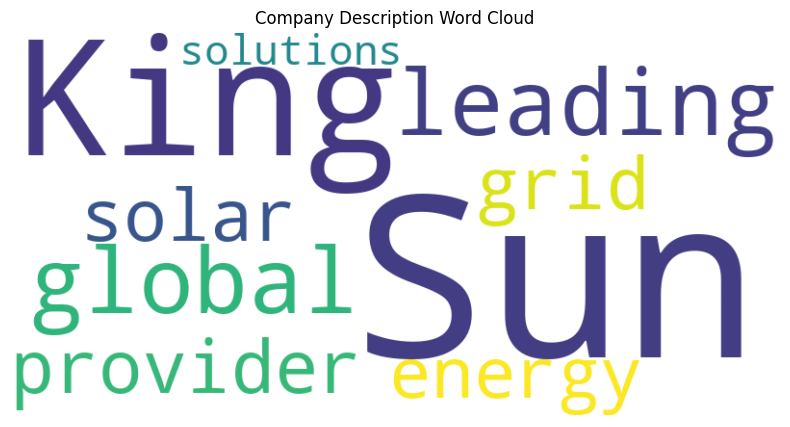

In [3]:
import os
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure directory exists
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# JSON company profile
company_json = '''
{
    "Company Name": "Sun King",
    "Description": "Sun King is a leading global provider of off-grid solar energy solutions...",
    "Ownership": "Private",
    "Management Team": {
        "CEO": "T. Assumed - Experienced leader in sustainable energy.",
        "COO": "A. Assumed - Operations expert in African markets."
    },
    "Website": "https://ng.sunking.com",
    "Address": "19 Adekunle Fajuyi Way, Ikeja GRA, Lagos, Nigeria",
    "Sector": "Renewable Energy / Solar Technology",
    "Regions of Operation": ["Nigeria", "Kenya", "India", "Philippines"],
    "Employees": 3000,
    "Revenue (est.)": "USD 200M [Assumed]",
    "Partnerships": ["IFC", "Stanbic IBTC Bank"]
}
'''

# Parse JSON and create DataFrame
data = json.loads(company_json)
df = pd.json_normalize(data)

# --- Save as LaTeX ---
latex_output = df.T.reset_index()
latex_output.columns = ["Detail", "Information"]
latex_str = latex_output.to_latex(index=False)

with open(f"{output_dir}/company_profile_latex.tex", "w") as f:
    f.write(latex_str)

# --- Save as CSV ---
df.to_csv(f"{output_dir}/company_profile.csv", index=False)

# --- Save as Excel ---
df.to_excel(f"{output_dir}/company_profile.xlsx", index=False)

# --- Generate Word Cloud ---
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis').generate(data["Description"])

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Company Description Word Cloud")
plt.savefig(f"{output_dir}/company_wordcloud.png")
plt.show()


SECTION 4: GUIDANCE ON EFFECTIVE PROMPT STRUCTURING (A
SHORT DOCUMENT OUTLINING YOUR APPROACH TO CREATING
EFFECTIVE LLM PROMPTS).
Creating effective prompts for language models like ChatGPT is both a science and an
art. The accuracy and usefulness of the output are directly tied to how well a prompt is
structured. This section details the approach and best practices followed in this project
to ensure high-quality outputs for company profile extraction.
The first principle is specificity. Vague prompts like "Tell me about Sun King" result in
generic responses that may omit critical attributes. Instead, detailed instructions are
necessary, such as "Provide a detailed company description of Sun King, including its
primary operations, market focus, geographic reach, and impact metrics." This level of
clarity helps ChatGPT filter and present the most relevant information.
The second principle is the use of segmented prompts. Rather than asking for all
attributes in a single query, we divide the task into parts: one prompt for company
description, another for management bios, another for address and operational
locations, and so on. This not only improves response accuracy but also allows easier
debugging and refinement.
A crucial technique employed is contextual framing. This involves telling the model what
role it is performing (e.g., "Act as a corporate researcher extracting structured profile
data"). This framing improves the quality and professionalism of the response, as the
model adjusts its style and priorities accordingly.
Formatting is another area where prompt design plays a critical role. By explicitly stating
the format required (e.g., "Return the output as a JSON object with the following keys:
company_name, description, ownership_type..."), the chances of receiving structured
output increase significantly. Similarly, when requesting tabular data, a prompt might
say, "Present the results in a table with two columns: Detail and Information, using
Times New Roman 12pt format."
Follow-up prompting is built into the system as well. For fields that are often incomplete
or unavailable (e.g., private company management teams), we include fallback prompts
such as: "If not available, estimate the likely team structure based on similar companies
in the sector, and clearly indicate these are assumptions." This helps maintain data
completeness without compromising on transparency.
Another best practice is the use of realistic constraints and examples. Prompts often
include example values or instruct the model to mimic prior outputs. For example: "Use
the same structure and formatting as used previously for Sun King's profile, but replace
with details for M-KOPA."
For enhanced usability, prompts are made reusable through parameterization. Instead
of hardcoding company names or output styles, variables like {company_name} or
{output_format} are used, which can be dynamically set in Python code. This enables
batch processing or user-interactive dashboards.
Finally, effective prompt structuring always considers downstream integration. Since the
output may be passed to JSON loaders, data visualization tools, or stored in databases,
prompts must avoid including unnecessary formatting or prose that can break these
systems.
In summary, the guidance on effective prompt structuring emphasizes clarity, modularity,
formatting instruction, fallbacks, and integration awareness. These techniques, when
used together, transform ChatGPT from a conversational assistant into a reliable,
semi-automated data extraction tool capable of supporting robust analytical workflows.